# Data Visualization / EDA - New York School Data

To see the code used to data clean and feature engineer, please click [here](https://github.com/jacquelinekclee/data_cleaning_exploration_nyc_schools_sat/blob/master/data_cleaning_sat_ny.ipynb).

This notebook will focus on exploratory data analysis and data visualization. This is the last step before modeling.

## Table of Contents
- [Collect descriptive statistics](#stats)
    - [Draw boxplot](#boxplot1)
- [Some additional feature engineering](#bh_aw)
- Visualizing SAT score breakdowns by:
    - [Ethnic majority of schools](#bar_eth)
    - [Low-income population of schools (based on how many students receive free/reduced lunch)](#bar_frl)
    - [Percent of enrolled students who took SAT](#bar_enrolled)
- [Score breakdowns by schools with majority Black/Hispanic students versus schools without Black/Hispanic majority](#bh_vs)
- [Comparing distributions](#distribs)
    - [Schools with predominantly Black/Hispanic students](#distrib_bh)
    - [Schools with predominantly Asian/White students](#distrib_bh)
    - [Majority Black/Hispanic schools vs. nationwide](#bh_nation)
    - [Majority Asian/White schools vs. nationwide](#aw_nation)
    - [Majority Black/Hispanic schools vs. majority Asian/White schools](#bh_aw_distrib)
    - [Socioeconomic class of students (based on how many students receive free/reduced lunch)](#frl_distrib)
    - [Schools of the 5 boroughs](#borough_distrib)

#### Imports 

In [606]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [621]:
sat_demos = pd.read_csv('sat_demos_cleaned.csv')
sat_demos.head()

,DBN,SCHOOL NAME,Percent of Students Enrolled Who Took SAT,SAT Composite Avg. Score,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SAT Composite Avg. Raw Score,frl_percent,asian_per,black_per,hispanic_per,white_per
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,6.9,600-1220,200-400,200-410,200-390,1122.0,88.6,14.0,29.1,53.8,1.7
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,23.1,600-1220,200-400,420-510,200-390,1172.0,71.8,29.2,22.6,45.9,2.3
2,01M450,EAST SIDE COMMUNITY SCHOOL,11.7,600-1220,200-400,200-410,200-390,1149.0,71.8,9.7,23.9,55.4,10.4
3,01M458,FORSYTH SATELLITE ACADEMY,3.1,600-1220,410-490,200-410,200-390,1174.0,72.8,2.2,34.4,59.4,3.6
4,01M509,MARTA VALLE HIGH SCHOOL,12.0,600-1220,200-400,420-510,200-390,1207.0,80.7,9.3,31.6,56.9,1.6


### Descriptive Statistics<a class="anchor" id="stats"></a> 

In [622]:
frl_stats = sat_demos['frl_percent'].describe()
frl_mean = frl_stats['mean']
frl_std = frl_stats['std']
frl_min = frl_stats['min']
frl_max = frl_stats['max']
frl_med = frl_stats['50%']

In [623]:
sat_raws_stats = sat_demos['SAT Composite Avg. Raw Score'].describe()
nyc_mean = sat_raws_stats['mean']
nyc_std = sat_raws_stats['std']
nyc_min = sat_raws_stats['min']
nyc_max = sat_raws_stats['max']

<a class="anchor" id="boxplot1"></a> 

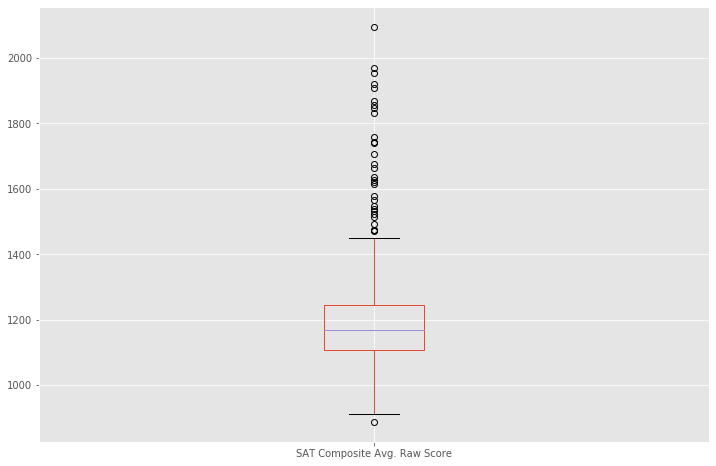

In [624]:
sat_demos.boxplot(column='SAT Composite Avg. Raw Score')

<a class="anchor" id="bh_aw"></a> 
I will add columns denoting the majority population of a school: either majority Black/Hispanic or majority Asian/White.

Values in the columns will be 100s and 0s (100 = True, 0 = False).

100 instead of 1 will be used so that the formatting is similar to the existing data.

This modification is being made to make the visualizations and analysis both more meaningful and easy to follow. 

The 'black_per' and 'hispanic_per' columns will be replaced by 'black_hispanic_per.' Similarly, 'asian_per' and 'white_per' will be replaced by 'asian_white_per.'

Below is an example a graph that uses the raw ethnicity percentages as opposed to the new columns. 

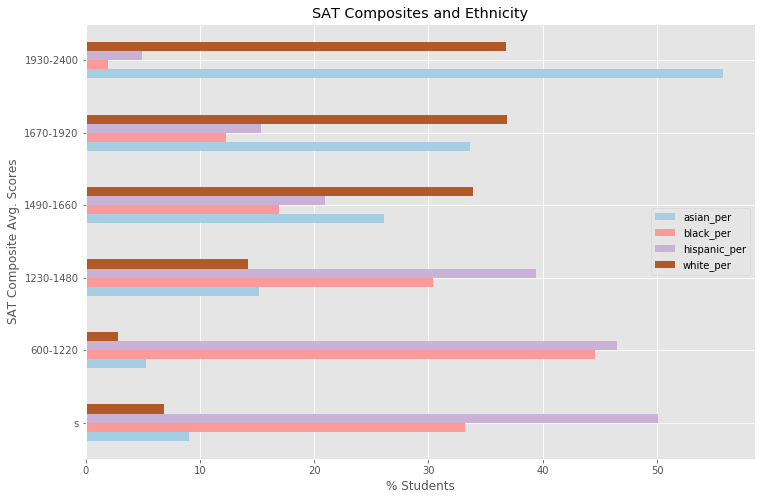

In [626]:
sat_demos['black_hispanic_per'] = sat_demos['black_per'] + sat_demos['hispanic_per']
sat_demos['asian_white_per'] = sat_demos['asian_per'] + sat_demos['white_per']
sat_demos['Black/Hispanic'] = 0
sat_demos['Asian/White'] = 0

In [627]:
for i, row in sat_demos.iterrows():
    if row['black_hispanic_per'] >= 50.0:
        sat_demos.at[i,'Black/Hispanic'] = 100
    else:
        sat_demos.at[i,'Asian/White'] = 100
sat_demos = sat_demos.drop(columns=['asian_per', 'black_per', 'hispanic_per', 'white_per'])
sat_demos.head()

,DBN,SCHOOL NAME,Percent of Students Enrolled Who Took SAT,SAT Composite Avg. Score,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SAT Composite Avg. Raw Score,frl_percent,black_hispanic_per,asian_white_per,Black/Hispanic,Asian/White
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,6.9,600-1220,200-400,200-410,200-390,1122.0,88.6,82.9,15.7,100,0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,23.1,600-1220,200-400,420-510,200-390,1172.0,71.8,68.5,31.5,100,0
2,01M450,EAST SIDE COMMUNITY SCHOOL,11.7,600-1220,200-400,200-410,200-390,1149.0,71.8,79.3,20.1,100,0
3,01M458,FORSYTH SATELLITE ACADEMY,3.1,600-1220,410-490,200-410,200-390,1174.0,72.8,93.8,5.8,100,0
4,01M509,MARTA VALLE HIGH SCHOOL,12.0,600-1220,200-400,420-510,200-390,1207.0,80.7,88.5,10.9,100,0


In [628]:
sat_demos.to_csv('sat_demos_model', index=False)

<a class="anchor" id="bar_eth"></a> 
### SAT Composite Scores & Ethnicity

In [568]:
composite_demos_grouped_unsorted = sat_demos.groupby('SAT Composite Avg. Score').mean()
composite_demos_indices = list(composite_demos_grouped_unsorted.index.values)

In [569]:
#order the rows based on index (score range)
composite_demos_indices.sort(key = lambda s: 0 if s == 's' else int(s[-4:]))

In [570]:
composite_demos_grouped = (pd.DataFrame(index=composite_demos_indices,
                                        columns=composite_demos_grouped_unsorted.columns))
for index in composite_demos_indices:
    composite_demos_grouped.loc[index] = composite_demos_grouped_unsorted.loc[index]

In [571]:
composite_demos_grouped

,Percent of Students Enrolled Who Took SAT,SAT Composite Avg. Raw Score,frl_percent,black_hispanic_per,asian_white_per,Black/Hispanic,Asian/White
s,0,1169,70.8658,83.2579,15.9158,89.4737,10.5263
600-1220,12.6175,1123.05,71.9857,91.1381,8.16958,96.8531,3.14685
1230-1480,15.5616,1320.45,58.7889,69.7788,29.3596,74.7475,25.2525
1490-1660,18.0846,1573.08,35.0769,37.8231,60.0077,15.3846,84.6154
1670-1920,22.7818,1805.45,26.6909,27.6818,70.5,0,100
1930-2400,23.3667,2006,27.1667,6.9,92.6,0,100


Bar plot below the average ethnic breakdown of a school for each SAT composite score range

For example, the student body of schools whose mean SAT score is in the 1230-1480 range is on average about 70% Black/Hispanic and 30% Asian/White.

Text(0, 0.5, 'SAT Composite Avg. Scores')

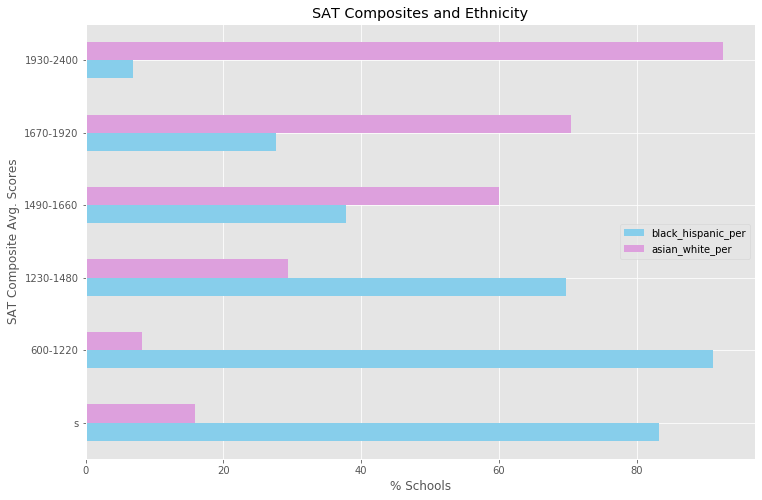

In [573]:
composite_maj = (composite_demos_grouped[['black_hispanic_per', 'asian_white_per']].
                 plot.barh(rot = 0, title = 'SAT Composites and Ethnicity',
                          color=['skyblue', 'plum']))
plt.xlabel("% Schools")
plt.ylabel("SAT Composite Avg. Scores")

The boxplot below indicates that for schools that score highest on average, they typically have a very small Black/Hispanic student population. This does not seem to vary for top-scoring schools. Schools that score the lowest on average have a very high Black/Hispanic student population. This typical range is also fairly small, but there are a lot of outliers, demonstrating that schools of all different ethnic breakdowns score lower on average.

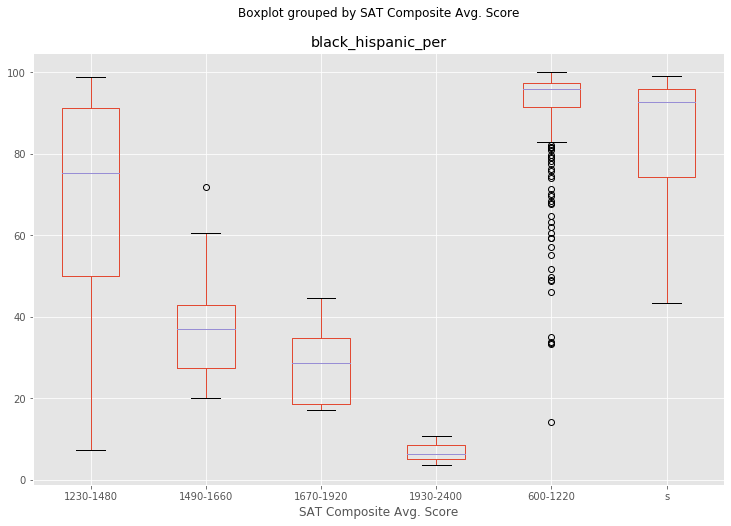

In [630]:
sat_demos.boxplot(by = 'SAT Composite Avg. Score', column = ['black_hispanic_per'])

<a class="anchor" id="bar_frl"></a> 
### SAT Composite Scores & Socioeconomic Class

The bar plot below demonstrates the average percentage of free/reduced price lunch recipients of schools for each SAT composite score range.

For example, schools with an average SAT score in the 1930-2400 range have, on average, about 27% of its students body being free/reduced lunch recipients

Text(0, 0.5, 'SAT Composite Avg. Scores')

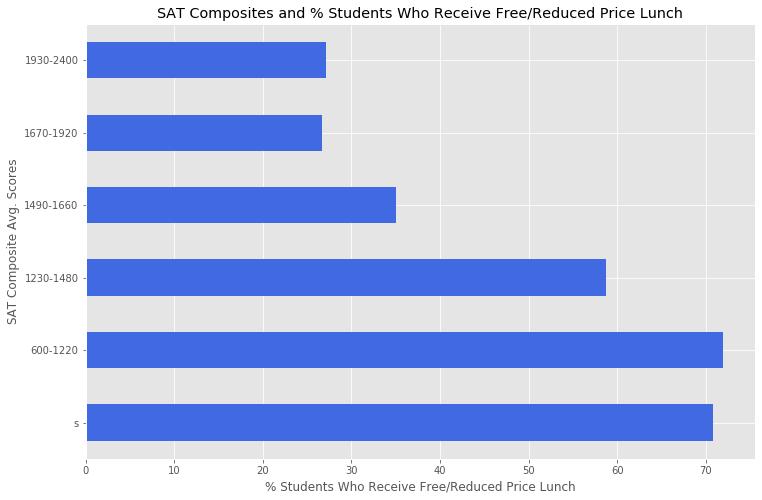

In [631]:
composite_frl = (composite_demos_grouped['frl_percent'].
                 plot.barh(rot=0, title = 'SAT Composites and % Students Who Receive Free/Reduced Price Lunch',
                           legend = False, color = ['royalblue']))
plt.xlabel("% Students Who Receive Free/Reduced Price Lunch")
plt.ylabel("SAT Composite Avg. Scores")

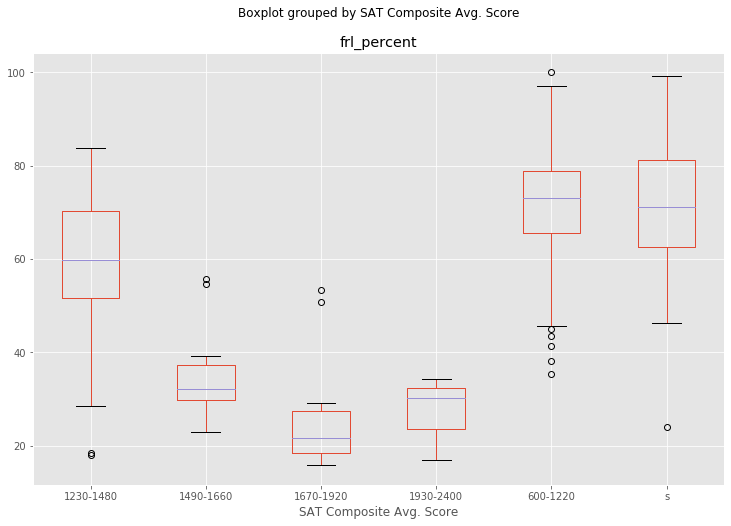

In [632]:
sat_demos.boxplot(by = 'SAT Composite Avg. Score', column = 'frl_percent')

<a class="anchor" id="bar_enrolled"></a> 
### SAT Composite Scores & Percent Enrolled Who Took SAT

The bar plot below demonstrates the average percentage of test takers of schools for each SAT composite score range.

For example, the mean percent of test takers schools with an average SAT score in the 1490-1660 range is about 18%.

Suppressed data points were not shown because # of test takers is < 5.

Text(0, 0.5, 'SAT Composite Avg. Scores')

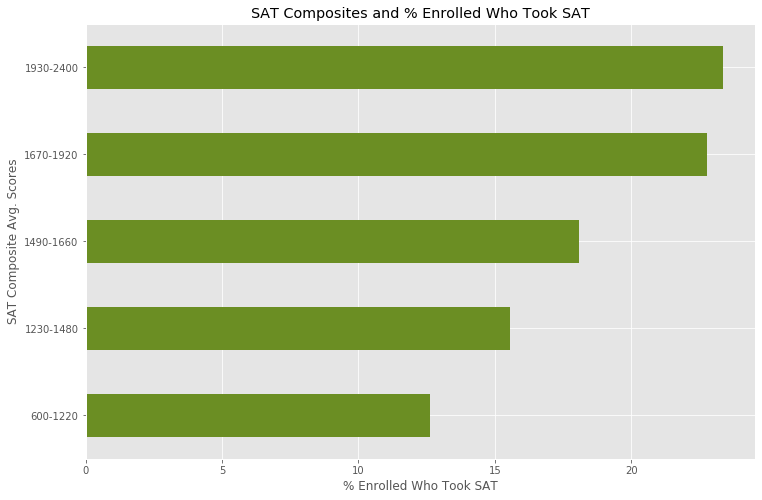

In [577]:
composite_takers = (composite_demos_grouped['Percent of Students Enrolled Who Took SAT'].iloc[1:].
                 plot.barh(rot=0, title = 'SAT Composites and % Enrolled Who Took SAT',
                           legend = False, color = ['olivedrab']))
plt.xlabel("% Enrolled Who Took SAT")
plt.ylabel("SAT Composite Avg. Scores")

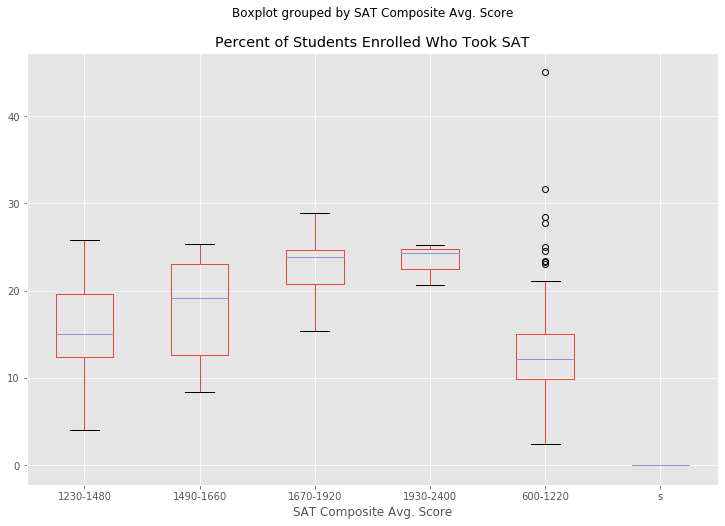

In [583]:
sat_demos.boxplot(by = 'SAT Composite Avg. Score', column = 'Percent of Students Enrolled Who Took SAT')

The percent of students enrolled who took the SAT does not seem to differ that much across schools whose average SAT scores are in different score ranges

<a class="anchor" id="bh_vs"></a> 
The below statistics and boxplots further show discrepancies between average SAT scores of schools with either predominantly Black/Hispanic or Asian/White students.

In [513]:
#schools with majority black and hispanic students
sat_raws_bh = sat_demos.loc[sat_demos['Black/Hispanic'] == 100]['SAT Composite Avg. Raw Score']
bh_std = np.std(sat_raws_bh)
bh_mean = np.mean(sat_raws_bh)
bh_min = min(sat_raws_bh)
bh_max = max(sat_raws_bh)
[bh_min, bh_max, bh_mean, bh_std]

[887.0, 1547.0, 1164.095607235142, 96.58790512997015]

In [514]:
#schools with majority asian and white students
sat_raws_aw = sat_demos.loc[sat_demos['Asian/White'] == 100]['SAT Composite Avg. Raw Score']
aw_std = np.std(sat_raws_aw)
aw_mean = np.mean(sat_raws_aw)
aw_min = min(sat_raws_aw)
aw_max = max(sat_raws_aw)
[aw_min, aw_max, aw_mean, aw_std]

[981.0, 2096.0, 1462.888888888889, 261.2209495421793]

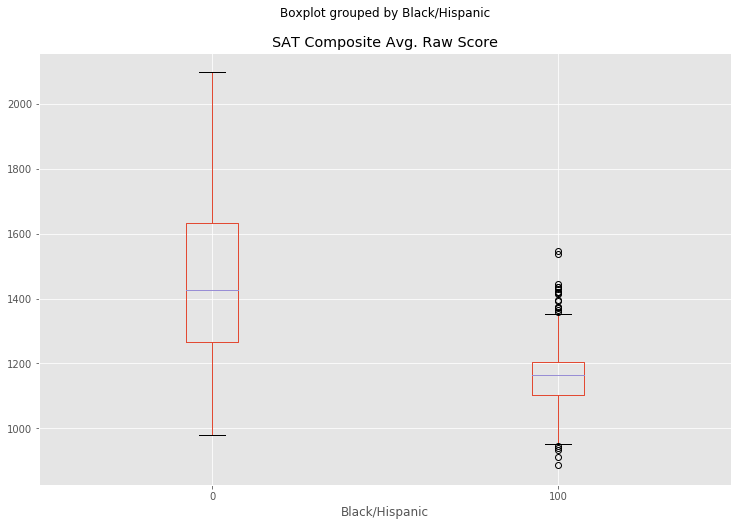

In [512]:
#100: schools with majority Black/Hispanic students
#0: schools with majority Asian/White students
sat_demos.boxplot(by = 'Black/Hispanic', column='SAT Composite Avg. Raw Score')

<a class="anchor" id="distribs"></a> 
## Comparing Distributions
Interestingly, the boxplot showing schools with predominantly Asian/White students' average SAT scores has no outliers and much longer whiskers and a wider interquartile range than the boxplot of schools with predominantly Asian/White students' average SAT scores.

The outlier schools out of the predominantly Black/Hispanic schools are, for the most part, hardly above the 50th percentile for predominantly Asian/White schools.

These stark differences will be further shown when comparing the distributions between predominantly Black/Hispanic schools versus predominantly Asian/White schools.

In addition to the histograms, scatter plots will better show any statistical differences between the NYC schools and their SAT scores.

To get an idea of what the distribution of SAT score should look like for all schools, despite demographics, I used the [2012 nationwide mean and standard deviation for rising seniors' SAT composite scores](https://secure-media.collegeboard.org/digitalServices/pdf/research/SAT-Percentile-Ranks-Composite-CR-M-W-2012.pdf).

This histogram below is a rough "normal" (expected) distribution of this. I will use this histogram to see if the distributions of predominantly Asian/White schools versus predominantly Black/Hispanic schools are different from each other and/or the nationwide, expected distribution.

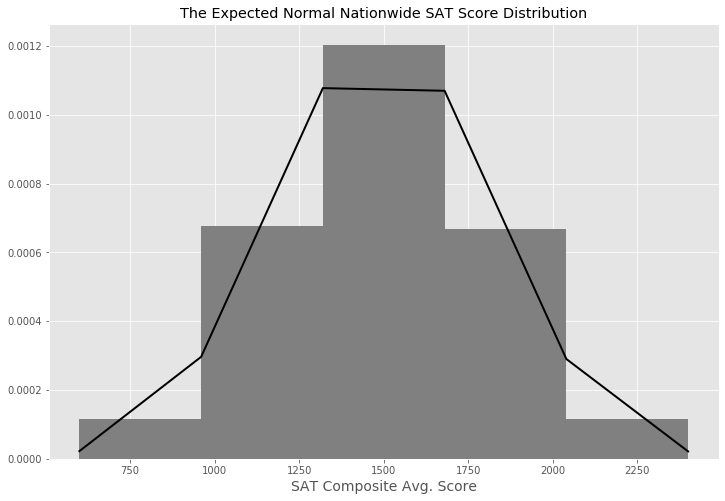

In [524]:
#sd and mean from above data source
sd = 316
mean = 1498

#simulate a normal distribution from 1,000,000 random samples using mean, sd
normal_composite = np.random.normal(mean, sd, 1000000)

#draw probability histogram 
counts, bins, ignored = plt.hist(normal_composite, 5, (600, 2400), density=True, color='gray')
x = 1/(sd * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * sd**2)) 
plt.plot(bins, x, color='black', linewidth = 2)
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.title("The Expected Normal Nationwide SAT Score Distribution")
plt.show()           

### By Ethnic Majority

<a class="anchor" id="distrib_bh"></a> 
Score distribution for schools with predominantly Black/Hispanic students 

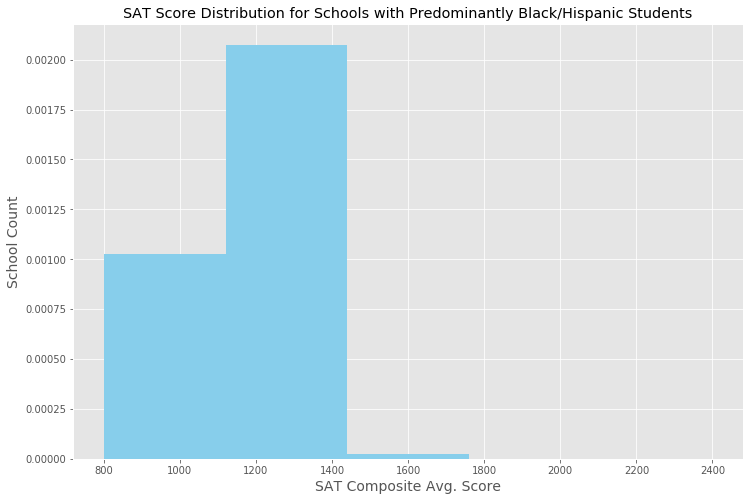

In [640]:
#plot histogram with raw data
plt.hist(sat_raws_bh, 5, (800, 2400), color='skyblue', density=True)
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("School Count", size=14)
plt.title("SAT Score Distribution for Schools with Predominantly Black/Hispanic Students")
plt.show()

<a class="anchor" id="distrib_aw"></a> 
Score distribution for schools with predominantly Asian/White students

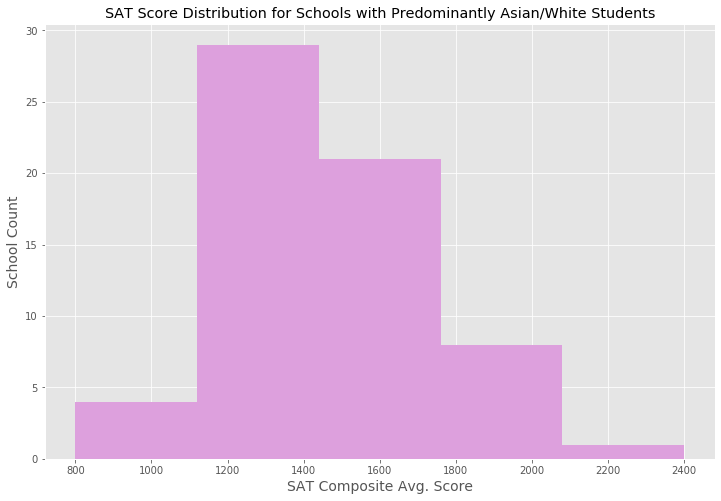

In [639]:
plt.hist(sat_raws_aw, 5, (800, 2400), color='plum')
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("School Count", size=14)
plt.title("SAT Score Distribution for Schools with Predominantly Asian/White Students")
plt.show()

<a class="anchor" id="bh_nation"></a> 
The score distribution for schools with a Black/Hispanic majority is unimodal and centered obviously left of the expected normal distribution.

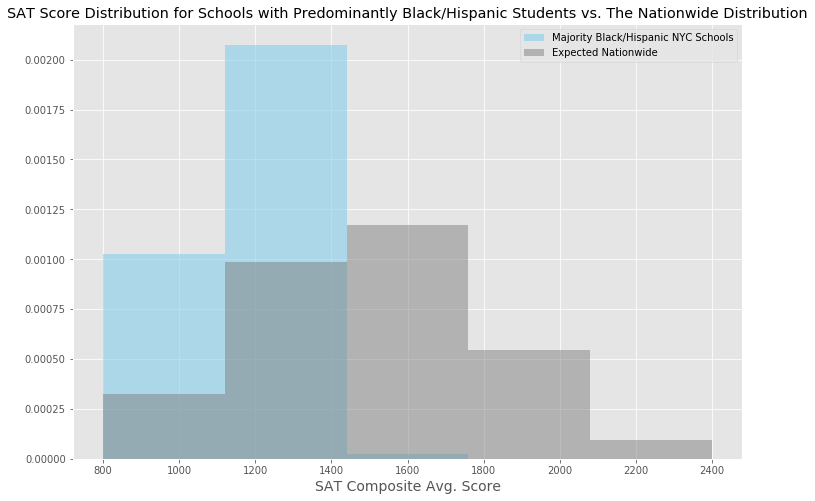

In [636]:
plt.hist(sat_raws_bh, 5, (800, 2400), alpha = 0.6, color='skyblue',density=True, label = ['Majority Black/Hispanic NYC Schools'])
(plt.hist(np.random.normal(mean, sd, 1000000), 5, (800, 2400), alpha = 0.5, color='gray', density=True,
         label = ['Expected Nationwide']))
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.title("SAT Score Distribution for Schools with Predominantly Black/Hispanic Students vs. The Nationwide Distribution")
plt.legend()
plt.show()

<a class="anchor" id="aw_nation"></a> 
The SAT score distribution for schools with an Asian/White majority has a similar center to the expected normal nationwide distribution, but is slightly skewed right.

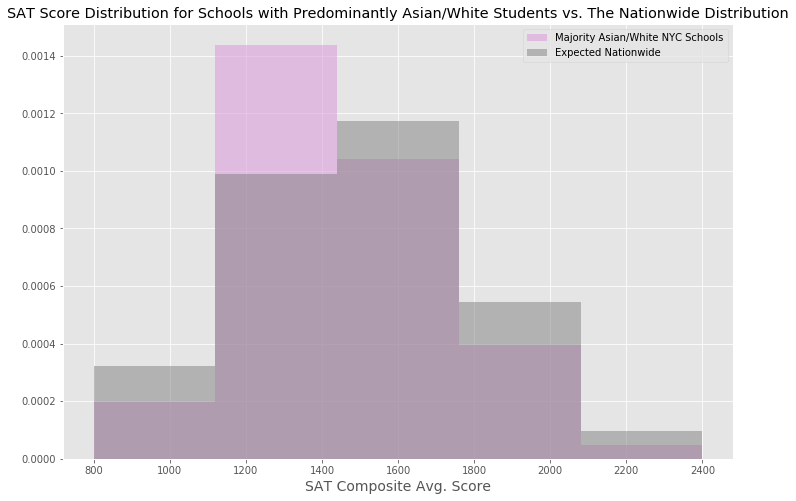

In [634]:
(plt.hist(sat_raws_aw, 5, (800, 2400), alpha = 0.6, color='plum', density=True, 
          label = ['Majority Asian/White NYC Schools']))
(plt.hist(np.random.normal(mean, sd, 1000000), 5, (800, 2400), alpha = 0.5, color='gray', density=True, 
         label = ['Expected Nationwide']))
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.title("SAT Score Distribution for Schools with Predominantly Asian/White Students vs. The Nationwide Distribution")
plt.legend()
plt.show()

<a class="anchor" id="bh_aw_distrib"></a> 
As seen in the overlaid histograms above and the one below, schools with more Asian/White students more often score at and/or above the national average.

Students in schools with a Black/Hispanic majority on average score lower than students nationwide and at schools with more Asian/White students.

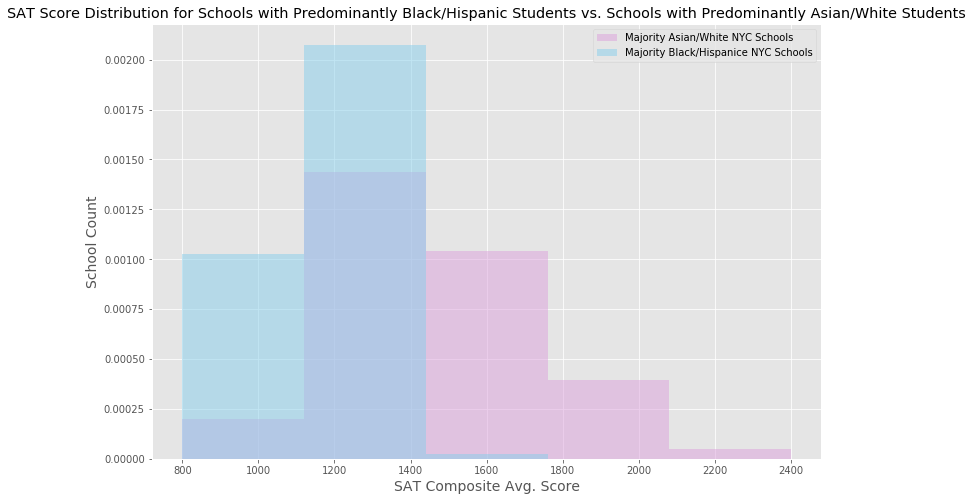

In [637]:
(plt.hist(sat_raws_aw, 5, (800, 2400), alpha = 0.5, color='plum', density=True, 
          label = ['Majority Asian/White NYC Schools']))
(plt.hist(sat_raws_bh, 5, (800, 2400), alpha = 0.5, color='skyblue',density=True,
         label = ['Majority Black/Hispanice NYC Schools']))
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("School Count", size=14)
plt.title("SAT Score Distribution for Schools with Predominantly Black/Hispanic Students vs. Schools with Predominantly Asian/White Students")
plt.legend()
plt.show()

<a class="anchor" id="frl_distrib"></a> 
### SAT Scores vs. Schools' Socioeconomic Status

In [532]:
scores_lower_frl = sat_demos.loc[sat_demos['frl_percent'] <= frl_med]['SAT Composite Avg. Raw Score']
scores_higher_frl = sat_demos.loc[sat_demos['frl_percent'] > frl_med]['SAT Composite Avg. Raw Score']

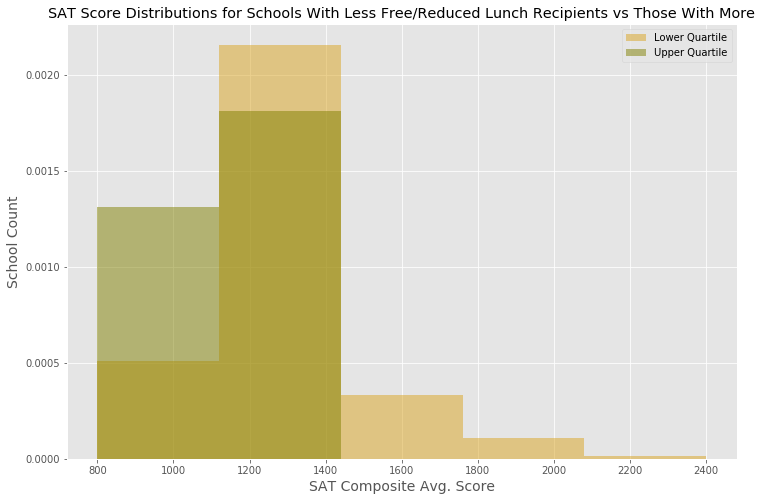

In [529]:
(plt.hist(scores_lower_frl, 5, (800, 2400), color='goldenrod', alpha = 0.5, density = True,
         label = ['Lower Quartile']))
(plt.hist(scores_higher_frl, 5, (800, 2400), color='olive', alpha = 0.5, density = True,
         label = ['Upper Quartile']))
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("School Count", size=14)
plt.title("SAT Score Distributions for Schools With Less Free/Reduced Lunch Recipients vs Those With More")
plt.legend()
plt.show()

Schools with less students that receive free/reduced lunch, and thus less students in lower socioeconomic classes, have more students that score above the national and NYC average on the SAT.

This right tail for schools with less free/reduced lunch recipeients is more significant than those of the histograms plotting score distributions for schools with an Asian/White majority student body. Such evidence hints that diffrences in socioeconomic class are more significant than ethnic differences when it somes to the SAT

<a class="anchor" id="borough_distrib"></a> 
### By Borough
Another way to look at how socioeconomic class and SAT scores is to look at school's data by the schools' boroughs (Manhattan, Brooklyn, Bronx, Queens, and Staten Island). The letters in the school's DBN (unique identifier) indicate which borough/county it is located in. M is for Manhattan County/Borough, K is for Kings County (Brooklyn), X is for Bronx County/Borough, Q is for Queens County/Borough, and R is for Richmond County (Staten Island).

According to the [census data](https://www.census.gov/quickfacts/fact/table/newyorkcountymanhattanboroughnewyork,bronxcountybronxboroughnewyork,queenscountyqueensboroughnewyork,kingscountybrooklynboroughnewyork,richmondcountystatenislandboroughnewyork,newyorkcitynewyork/HSG010219), based on median household income in 2018 dollars (2014-2018), the boroughs are ranked in from highest to lowest median househould income as below:
1. Manhattan
2. Staten Island
3. Queens
4. Brooklyn
5. Bronx

I will look at schools from each borough, create histograms for each, and compare them to the nationwide estimated score distribution (based on nationwide average and standard deviation).

In [652]:
scores = []
m_scores = []
r_scores = []
q_scores = []
k_scores = []
x_scores = []
sat_demos['Manhattan'] = 0
sat_demos['Staten Island'] = 0
sat_demos['Queens'] = 0
sat_demos['Brooklyn'] = 0
sat_demos['Bronx'] = 0
for i, row in sat_demos.iterrows():
    dbn = row['DBN']
    score = row['SAT Composite Avg. Raw Score']
    scores.append(score)
    if 'M' in dbn:
        m_scores.append(score)
        sat_demos.at[i,'Manhattan'] = 100
    elif 'Q' in dbn:
        q_scores.append(score)
        sat_demos.at[i,'Queens'] = 100
    elif 'K' in dbn:
        k_scores.append(score)
        sat_demos.at[i,'Brooklyn'] = 100
    elif 'X' in dbn:
        x_scores.append(score)
        sat_demos.at[i,'Bronx'] = 100
    elif 'R' in dbn:
        r_scores.append(score)
        sat_demos.at[i,'Staten Island'] = 100

In [658]:
sat_demos.to_csv('sat_demos_with_boroughs')

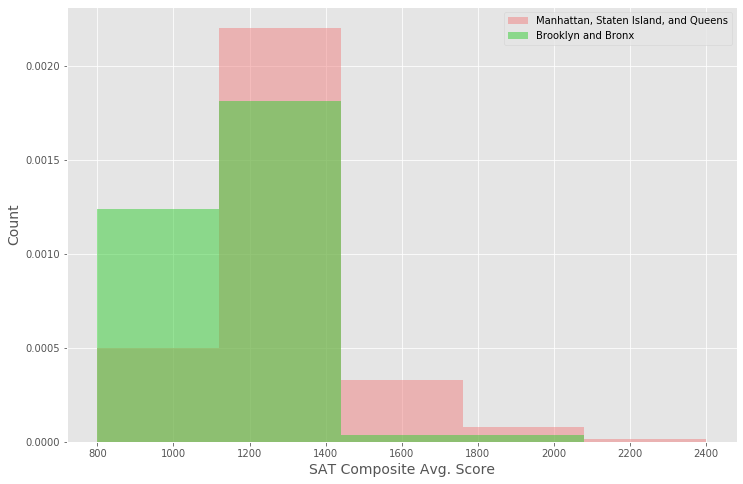

In [653]:
plt.hist(m_scores+r_scores+q_scores, 5, (800, 2400), color='lightcoral', alpha = 0.5, label=['Manhattan, Staten Island, and Queens'], density=True)
plt.hist(k_scores+x_scores, 5, (800, 2400), color='limegreen', alpha = 0.5, label=['Brooklyn and Bronx'], density=True)
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("Count", size=14)
plt.legend()
plt.show()

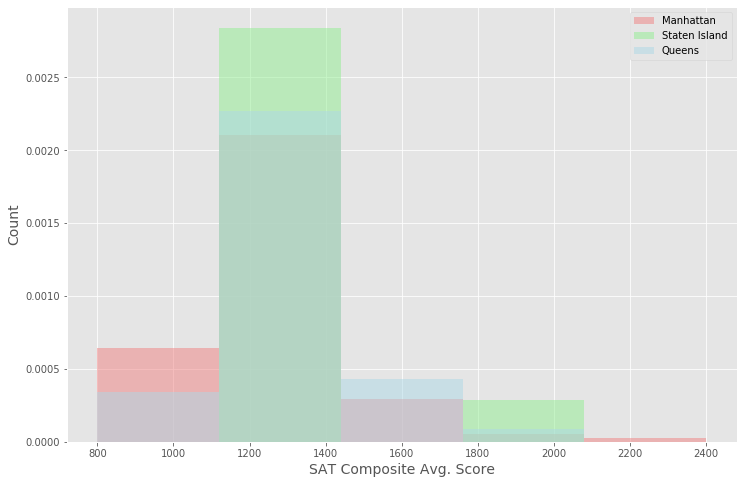

In [654]:
plt.hist(m_scores, 5, (800, 2400), color='lightcoral', alpha = 0.5, label=['Manhattan'], density=True)
plt.hist(r_scores, 5, (800, 2400), color='lightgreen', alpha = 0.5, label=['Staten Island'], density=True)
plt.hist(q_scores, 5, (800, 2400), color='lightblue', alpha = 0.5, label=['Queens'], density=True)
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("Count", size=14)
plt.legend()
plt.show()

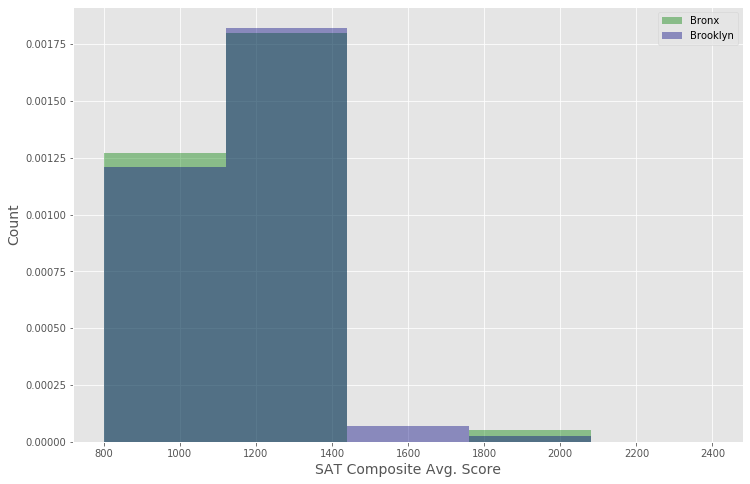

In [656]:
plt.hist(x_scores, 5, (800, 2400), color='green', alpha = 0.4, label=['Bronx'], density=True)
plt.hist(k_scores, 5, (800, 2400), color='navy', alpha = 0.4, label=['Brooklyn'], density=True)
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("Count", size=14)
plt.legend()
plt.show()

When compared to the three richest boroughs, the Bronx's distribution has a more significant left skew than the others. The distributions for Manhattan, Queens, and Staten Island all have a more significant right skew, meaning that more students in these boroughs score higher than students in the Bronx.

Manhattan's histogram has the longest right tail, meaning more of its students scored above average on the SAT. Staten Island's histogram is the only one centered at around 1250-1500 (the average score range), where the others are centered at 1000-1250 (below average). 

All of this information seem to point that the more well of a borough is, the more students score higher on the SAT.